In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
glasses_train=np.load(r"Datasets\9_3_full-dataset\Glasses & Sunglasses - Train.npz")
glasses_val=np.load(r"Datasets\9_3_full-dataset\Glasses & Sunglasses - Validation.npz")
glasses_test=np.load(r"Datasets\9_3_full-dataset\Glasses & Sunglasses - Test.npz")

In [3]:
images_train=glasses_train['images']
labels_train=glasses_train['labels']

images_val=glasses_val['images']
labels_val=glasses_val['labels']

images_test=glasses_test['images']
labels_test=glasses_test['labels']

In [4]:
images_train=images_train/255.0
images_val=images_val/255.0
images_test=images_test/255.0

In [5]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, 5, activation='relu', input_shape=(120,90,3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2)
                                ])
    
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [6]:
EPOCHS = 15
BATCH_SIZE = 64

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor = 'val_loss',
        mode = 'auto',
        min_delta = 0,
        patience = 2,
        verbose = 0, 
        restore_best_weights = True
    )

In [8]:
 model.fit(
        images_train,
        labels_train,
        epochs = EPOCHS,
        batch_size = BATCH_SIZE,
        callbacks = [ early_stopping],
        validation_data = (images_val,labels_val),
        verbose = 2
    )

Epoch 1/15
63/63 - 39s - loss: 0.3868 - accuracy: 0.8198 - val_loss: 0.2198 - val_accuracy: 0.9520 - 39s/epoch - 621ms/step
Epoch 2/15
63/63 - 38s - loss: 0.1560 - accuracy: 0.9513 - val_loss: 0.2029 - val_accuracy: 0.9420 - 38s/epoch - 606ms/step
Epoch 3/15
63/63 - 38s - loss: 0.1461 - accuracy: 0.9558 - val_loss: 0.2316 - val_accuracy: 0.9360 - 38s/epoch - 603ms/step
Epoch 4/15
63/63 - 37s - loss: 0.1710 - accuracy: 0.9410 - val_loss: 0.2132 - val_accuracy: 0.9620 - 37s/epoch - 591ms/step


In [9]:
 _, accuracy = model.evaluate(images_val,labels_val)

16/16 [==============================] - 1s 78ms/step - loss: 0.2029 - accuracy: 0.9420


In [20]:
eyeglass=Image.open(r"imgs\eyeglass.jpg")
eyeglasses=Image.open(r"imgs\eyeglasses.jpg")
eyeglasses_=Image.open(r"imgs\eyeglasses_.jpg")
glasses=Image.open(r"imgs\glasses.jpg")
glasses_=Image.open(r"imgs\12.jpg")
sunglasses=Image.open(r"imgs\sunglasses.jpg")
links=[r"imgs\eyeglass.jpg",r"imgs\eyeglasses.jpg",r"imgs\eyeglasses_.jpg",
       r"imgs\glasses.jpg",r"imgs\12.jpg",r"imgs\sunglasses.jpg"]
img_list=[eyeglass,eyeglasses,eyeglasses_,glasses,glasses_,sunglasses]

1/1 [==============================] - 0s 18ms/step


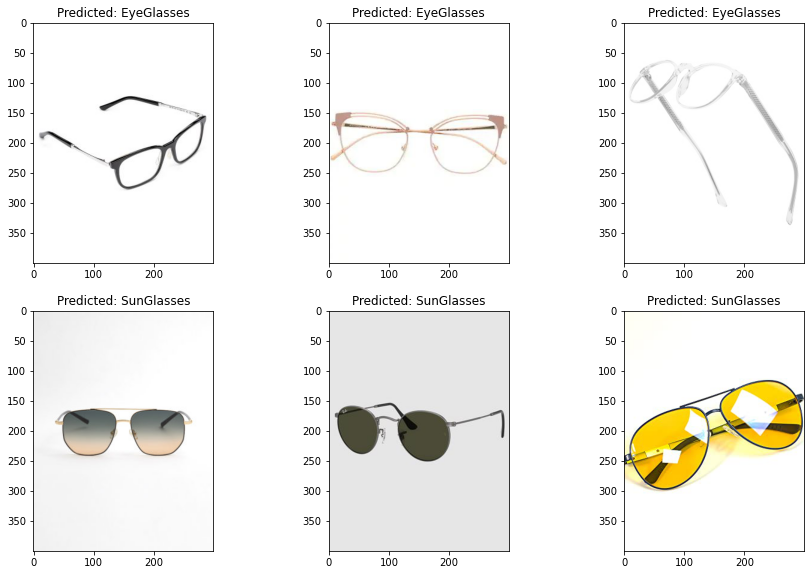

In [22]:
plt.figure(figsize=(15, 15))
for i in img_list:
    ax = plt.subplot(3, 3, img_list.index(i) + 1)
    img=plt.imread(links[img_list.index(i)])
    plt.imshow(img)
    i.thumbnail((90,120))
    img_array=np.asarray(i)
    img_array=tf.expand_dims(img_array,0)
    img_array=img_array/255
    predictions=model.predict(img_array)
    class_name=np.argmax(predictions)
    if class_name == 0:
        plt.title('Predicted: EyeGlasses')
    else : plt.title('Predicted: SunGlasses')